## Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys


import numpy as np
import pandas as pd



from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv('data\listings_detailed.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3002,https://www.airbnb.com/rooms/3002,20230910055919,2023-09-11,city scrape,Condo in Honolulu · ★4.72 · 1 bedroom · 1 bed ...,Oct 3-10. Only renting while I'm gone on vacat...,Waikiki has nice weather 90% percent if the ye...,https://a0.muscache.com/pictures/adf53d15-ab4b...,3364,...,4.87,4.96,4.74,92- 0251181,f,1,1,0,0,1.52
1,5269,https://www.airbnb.com/rooms/5269,20230910055919,2023-09-10,city scrape,Rental unit in Kamuela · ★4.67 · 1 bedroom · 1...,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,...,4.89,5.00,4.85,119-269-5808-01R,f,4,4,0,0,0.19
2,5387,https://www.airbnb.com/rooms/5387,20230910055919,2023-09-10,city scrape,Rental unit in Captain Cook · ★4.65 · Studio ·...,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,...,4.87,4.74,4.76,NaN,t,3,3,0,0,1.28
3,128160,https://www.airbnb.com/rooms/128160,20230910055919,2023-09-11,previous scrape,Resort in Lahaina · 2 bedrooms · 3 beds · 2 baths,"Enjoy our timeshare resort ownership! 1,260 sq...","Resort is beachfront, located in north Kaanapa...",https://a0.muscache.com/pictures/c566fcc9-dd60...,634010,...,5.00,5.00,5.00,Exempt,f,1,0,1,0,0.02
4,5389,https://www.airbnb.com/rooms/5389,20230910055919,2023-09-10,city scrape,Home in Kailua Kona · ★4.88 · 3 bedrooms · 4 b...,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,https://a0.muscache.com/pictures/15520396/3b89...,7878,...,4.87,4.98,4.73,NaN,f,3,3,0,0,0.44


In [209]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## Task 1

Business: Your task will be to help a company operating small and mid-size apartments hosting 2-6 guests. The company is set to price their new apartments not on the market.<br>
• Pick a city you will operate in.<br>
• Build a price prediction model similarly to how we did in our case<br>
study for London.<br>
• Discuss your modeling decisions and compare your results to those of
the case study<br>

1 OLS, 1 Random Forest or Boosting, 1 different model of your choice<br>


NOTE: I choose Hawaii, even though it is not a city, the prices throughout the islands are similar.

### First step: Preprocessing

In [3]:
df = df[["price", "beds", "bedrooms",'amenities', "property_type", "room_type", "host_identity_verified","host_has_profile_pic", "accommodates", "minimum_nights", "review_scores_rating", "review_scores_location"]]

I found these attributes to be probably most relevant and most "independent" from each other. Some of them may be almost totally not relevant, but it is good to measure

In [4]:
df[~(df.isna().any(axis=1))]

,price,beds,bedrooms,amenities,property_type,room_type,host_identity_verified,host_has_profile_pic,accommodates,minimum_nights,review_scores_rating,review_scores_location
0,$90.00,1.0,1.0,"[""Public or shared beach access"", ""Refrigerato...",Entire condo,Entire home/apt,t,t,2,4,4.72,4.96
1,$140.00,1.0,1.0,"[""Refrigerator"", ""Hot water"", ""Fire extinguish...",Entire rental unit,Entire home/apt,t,t,2,5,4.67,5.00
3,$900.00,3.0,2.0,"[""Hair dryer"", ""Hot water"", ""Fire extinguisher...",Private room in resort,Private room,t,t,6,5,5.00,5.00
4,$352.00,4.0,3.0,"[""HDTV with Roku, standard cable, DVD player"",...",Entire home,Entire home/apt,t,t,6,5,4.88,4.98
8,$110.00,1.0,1.0,"[""Refrigerator"", ""Hair dryer"", ""Hot water"", ""F...",Entire condo,Entire home/apt,f,t,2,3,4.54,4.73
...,...,...,...,...,...,...,...,...,...,...,...,...
33223,$201.00,4.0,3.0,"[""Other stainless steel electric stove"", ""Refr...",Entire home,Entire home/apt,t,t,7,1,5.00,5.00
33226,$105.00,6.0,1.0,"[""Shared outdoor pool - available all year, he...",Entire rental unit,Entire home/apt,t,t,8,3,5.00,5.00
33230,$159.00,3.0,1.0,"[""Central air conditioning"", ""Hair dryer"", ""Ho...",Entire rental unit,Entire home/apt,t,t,4,3,5.00,5.00
33231,$75.00,1.0,1.0,"[""Shared outdoor pool - available all year, he...",Entire rental unit,Entire home/apt,t,t,3,3,5.00,5.00


20000+ rows don't have any NaNs in this domain

In [212]:
df['property_type'].value_counts()[0:20]

property_type
Entire condo                         15911
Entire rental unit                    5152
Entire home                           3815
Entire serviced apartment             1289
Private room in resort                 851
Room in hotel                          753
Private room in home                   636
Entire guest suite                     617
Entire townhouse                       560
Entire villa                           541
Entire guesthouse                      490
Entire cottage                         330
Room in boutique hotel                 259
Private room in rental unit            213
Entire vacation home                   177
Camper/RV                              174
Private room in bed and breakfast      157
Entire cabin                           127
Private room in condo                  117
Entire home/apt                        115
Name: count, dtype: int64

Select only apartment-like listings

In [5]:
df = df[df['property_type'].isin(['Apartment', 'Entire condo', 'Entire rental unit', 'Entire serviced apartment', "Private room in rental unit","Private room in condo" ])]

In [6]:
df["room_type"].value_counts()

room_type
Entire home/apt    22352
Private room         330
Name: count, dtype: int64

In [7]:
df = df[(df["accommodates"]>1)&(df["accommodates"]<7)]

Not numerical columns:

In [216]:
df.select_dtypes(include=[object])

,price,amenities,property_type,room_type,host_identity_verified,host_has_profile_pic
0,$90.00,"[""Public or shared beach access"", ""Refrigerato...",Entire condo,Entire home/apt,t,t
1,$140.00,"[""Refrigerator"", ""Hot water"", ""Fire extinguish...",Entire rental unit,Entire home/apt,t,t
2,$105.00,"[""Refrigerator"", ""Hair dryer"", ""Hot water"", ""S...",Entire rental unit,Entire home/apt,t,t
5,$76.00,"[""Refrigerator"", ""Hot water"", ""Fire extinguish...",Private room in rental unit,Private room,t,t
6,$92.00,"[""Refrigerator"", ""Hair dryer"", ""Hot water"", ""C...",Entire condo,Entire home/apt,t,t
...,...,...,...,...,...,...
33333,$89.00,"[""Self check-in"", ""Outdoor dining area"", ""Smok...",Entire rental unit,Entire home/apt,t,t
33334,$160.00,"[""Self check-in"", ""Outdoor dining area"", ""Smok...",Entire rental unit,Entire home/apt,f,t
33335,$141.00,"[""Microwave"", ""Smoke alarm"", ""Hair dryer"", ""Ho...",Entire rental unit,Entire home/apt,t,t
33337,$91.00,"[""Paid parking off premises"", ""First aid kit"",...",Entire rental unit,Entire home/apt,t,t


Turn price into float

In [8]:
df["price"] = df["price"].str.replace("$", "").str.replace(",", "")
df["price"] = df["price"].astype(float)


In [9]:
df["host_identity_verified"] = [1 if x == "t" else 0 for x in df["host_identity_verified"]]
df["host_has_profile_pic"] = [1 if x == "t" else 0 for x in df["host_has_profile_pic"]]

Let's see what we can do with amenities

In [10]:
amenities = []
for l in df["amenities"]:
    for word in l.replace("[", "").replace("]", "").replace('"', "").split(","):
        if word not in amenities:
            amenities.append(word)
len(amenities)

3426

That is too many type of amenities. Let's try to find the most common ones

In [11]:
amenity_df = pd.DataFrame({'Name': amenities, 'Count': 0})
for amenity in amenities:
    amenity_df.loc[amenity_df['Name'] == amenity, 'Count'] = df["amenities"].apply(lambda x: 1 if amenity in x else 0).sum()
amenity_df

,Name,Count
0,Public or shared beach access,2699
1,Refrigerator,10
2,Hair dryer,0
3,Hot water,0
4,Carbon monoxide alarm,0
...,...,...
3421,Ocean view,3991
3422,Bose mini soundlink sound system with Bluetoo...,0
3423,Fast wifi \u2013 391 Mbps,0
3424,Hotpoint stainless steel electric stove,0


In [12]:
amenity_df.sort_values(by="Count", ascending=False).head(30)

,Name,Count
530,,20495
3257,Wifi,19533
3080,Kitchen,18678
778,Smoke alarm,18673
143,Hair dryer,18292
802,Iron,16710
432,Microwave,16258
37,Refrigerator,15766
1001,Hot water,14546
353,Self check-in,13054


Kind of one-hot encoding for some amenities

In [13]:
df["Kitchen"] = df["amenities"].apply(lambda x: 1 if "Kitchen" in x else 0)
df["Heating"] = df["amenities"].apply(lambda x: 1 if "Heating" in x else 0)
df["Microwave"] = df["amenities"].apply(lambda x: 1 if "Microwave" in x else 0)
df["Air conditioning"] = df["amenities"].apply(lambda x: 1 if "Air conditioning" in x else 0)
df["Refrigerator"] = df["amenities"].apply(lambda x: 1 if "Refrigerator" in x else 0)
df["TV with standard cable"]=df["amenities"].apply(lambda x: 1 if "TV with standard cable" in x else 0)
df["Pool"]=df["amenities"].apply(lambda x: 1 if "Pool" in x else 0)
df["Beach access"]=df["amenities"].apply(lambda x: 1 if "Beach access" in x else 0)
df["Private patio or balcony"] = df["amenities"].apply(lambda x: 1 if "Private patio or balcony" in x else 0)
df["Oven"]=df["amenities"].apply(lambda x: 1 if "Oven" in x else 0)
df.drop(columns=["amenities"], inplace=True)
df

,price,beds,bedrooms,property_type,room_type,host_identity_verified,host_has_profile_pic,accommodates,minimum_nights,review_scores_rating,...,Kitchen,Heating,Microwave,Air conditioning,Refrigerator,TV with standard cable,Pool,Beach access,Private patio or balcony,Oven
0,90.0,1.0,1.0,Entire condo,Entire home/apt,1,1,2,4,4.72,...,1,0,1,1,1,1,1,0,1,0
1,140.0,1.0,1.0,Entire rental unit,Entire home/apt,1,1,2,5,4.67,...,1,0,0,0,1,1,0,0,0,1
2,105.0,2.0,NaN,Entire rental unit,Entire home/apt,1,1,2,5,4.65,...,1,0,1,0,1,0,0,0,1,1
5,76.0,1.0,NaN,Private room in rental unit,Private room,1,1,2,3,4.57,...,1,0,1,1,1,0,0,0,0,0
6,92.0,1.0,NaN,Entire condo,Entire home/apt,1,1,2,3,4.71,...,0,0,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33333,89.0,1.0,1.0,Entire rental unit,Entire home/apt,1,1,2,1,NaN,...,1,0,0,0,0,0,0,0,0,0
33334,160.0,1.0,1.0,Entire rental unit,Entire home/apt,0,1,2,30,NaN,...,1,0,0,1,0,0,1,1,0,0
33335,141.0,2.0,1.0,Entire rental unit,Entire home/apt,1,1,4,7,NaN,...,1,0,1,1,1,0,1,1,0,0
33337,91.0,1.0,1.0,Entire rental unit,Entire home/apt,1,1,2,4,NaN,...,1,0,0,0,0,0,0,1,0,0


In [14]:
#One hot encoding
df = pd.get_dummies(df, columns=["property_type", "room_type"])
df.replace(True, 1, inplace=True)
df.replace(False, 0, inplace=True)

In [15]:
df = df.dropna().reset_index(drop=True)

Before we normalize, let's see the prices increasing

<Axes: ylabel='price'>

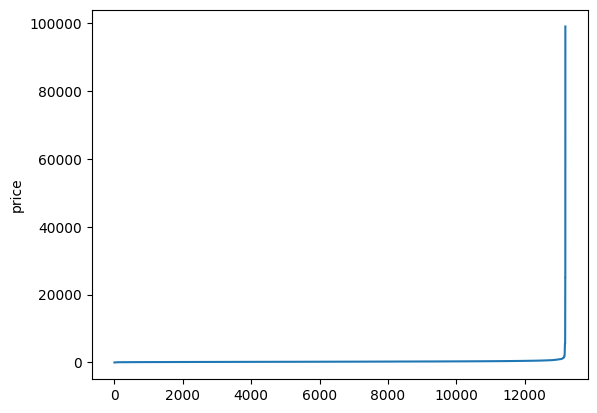

In [225]:
sns.lineplot(x=list(range(len(df))), y=df["price"].sort_values())

Well, damn, that big price is too much. Let's remove it


In [16]:
df = df[(df["price"] < 30000)&(df["price"]>0)].reset_index(drop=True)


<Axes: ylabel='price'>

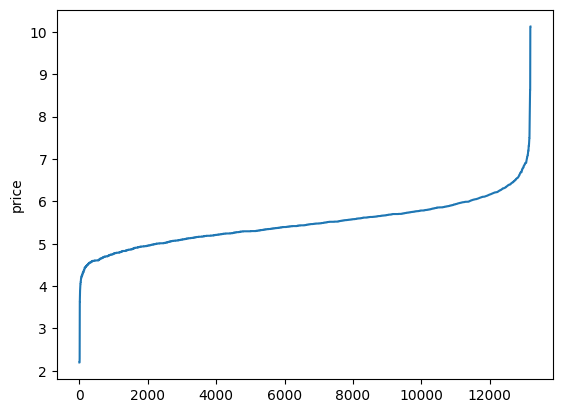

In [227]:
sns.lineplot(x=list(range(len(df))), y=np.log(df["price"]).sort_values())

In [17]:
#Take log of price

df["price"] = np.log(df["price"])
df.rename(columns={"price": "log_price"}, inplace=True)

Normalize (mostly for OLS)

In [18]:
#Normalizing

for col in df.columns[1:]:
    df[col] = (df[col] - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
df

,log_price,beds,bedrooms,host_identity_verified,host_has_profile_pic,accommodates,minimum_nights,review_scores_rating,review_scores_location,Kitchen,...,Beach access,Private patio or balcony,Oven,property_type_Entire condo,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Private room in condo,property_type_Private room in rental unit,room_type_Entire home/apt,room_type_Private room
0,4.499810,0.000000,0.000000,1.0,1.0,0.00,0.016304,0.9300,0.9900,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.941642,0.000000,0.000000,1.0,1.0,0.00,0.021739,0.9175,1.0000,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,4.700480,0.000000,0.000000,0.0,1.0,0.00,0.010870,0.8850,0.9325,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5.273000,0.142857,0.142857,0.0,1.0,1.00,0.010870,0.9100,0.9425,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.298317,0.142857,0.000000,1.0,1.0,0.50,0.016304,0.9175,0.9575,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184,5.262690,0.142857,0.000000,1.0,0.0,0.50,0.000000,1.0000,1.0000,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13185,4.477337,0.000000,0.000000,1.0,1.0,0.00,0.000000,1.0000,1.0000,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13186,5.068904,0.285714,0.000000,1.0,1.0,0.50,0.010870,1.0000,1.0000,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13187,4.317488,0.000000,0.000000,1.0,1.0,0.25,0.010870,1.0000,1.0000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Model 1: OLS

In [19]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop(columns=["log_price"])
y = df["log_price"]

model1 = LinearRegression()
model1.fit(X, y)
y_pred = model1.predict(X)
y_pred_transformed = np.exp(y_pred)*np.exp((np.std(y_pred)**2)/2)
y_transformed = np.exp(y)
print("MSE:", mean_squared_error(y_transformed, y_pred_transformed))


MSE: 278465.2289528362


Hmm, that seems suspiciously much. Let's plot this

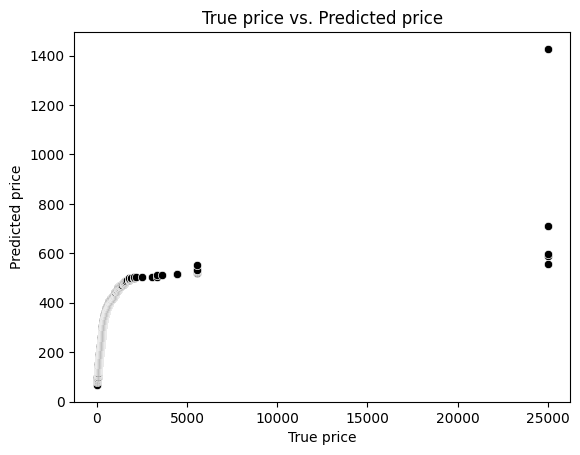

In [234]:
#Plot y and y_pred

sns.scatterplot(x=np.sort(y_transformed), y=np.sort(y_pred_transformed), color="black")
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.title("True price vs. Predicted price")
plt.show()


The outliers really ruin it, Let's exclude them

In [235]:
print("MSE:", mean_squared_error(np.sort(y_transformed)[:-10], np.sort(y_pred_transformed)[:-10]))

MSE: 24392.893343105654


Still much, but a magnitude better. 

Model 2: Random Forest

In [22]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

df["log_price"] = np.exp(df["log_price"])
df.rename(columns={"log_price": "price"}, inplace=True)

y = df["price"]
tune_grid = {"max_features": [5, 9, None], "min_samples_split": [5, 10]}

rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=20001104)
rf_cv = GridSearchCV(
    rf, tune_grid, cv=5, scoring="neg_root_mean_squared_error", verbose=3
)

rf_cv.fit(X, y)
print(rf_cv.best_params_)

y_pred2 = rf_cv.predict(X)
print("MSE:", mean_squared_error(y, y_pred2))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END max_features=5, min_samples_split=5;, score=-178.427 total time=   0.9s
[CV 2/5] END max_features=5, min_samples_split=5;, score=-977.974 total time=   1.0s
[CV 3/5] END max_features=5, min_samples_split=5;, score=-141.790 total time=   1.0s
[CV 4/5] END max_features=5, min_samples_split=5;, score=-242.543 total time=   1.0s
[CV 5/5] END max_features=5, min_samples_split=5;, score=-563.170 total time=   1.0s
[CV 1/5] END max_features=5, min_samples_split=10;, score=-172.701 total time=   0.9s
[CV 2/5] END max_features=5, min_samples_split=10;, score=-978.154 total time=   0.9s
[CV 3/5] END max_features=5, min_samples_split=10;, score=-140.934 total time=   0.9s
[CV 4/5] END max_features=5, min_samples_split=10;, score=-243.100 total time=   0.9s
[CV 5/5] END max_features=5, min_samples_split=10;, score=-562.158 total time=   0.9s
[CV 1/5] END max_features=9, min_samples_split=5;, score=-224.259 total time=   1.5s


<Axes: >

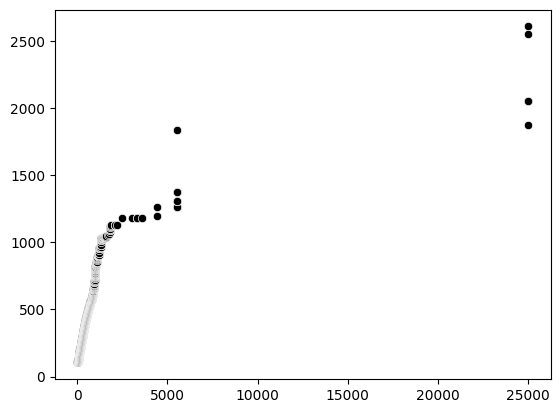

In [237]:
#Again plot y and y_pred

sns.scatterplot(x=np.sort(y), y=np.sort(y_pred2), color="black")

In [238]:
#Again remove outliers

print("MSE:", mean_squared_error(np.sort(y)[:-10], np.sort(y_pred2)[:-10]))

MSE: 11385.499111660112


Twice as good as OLS. Let's see the feature importances

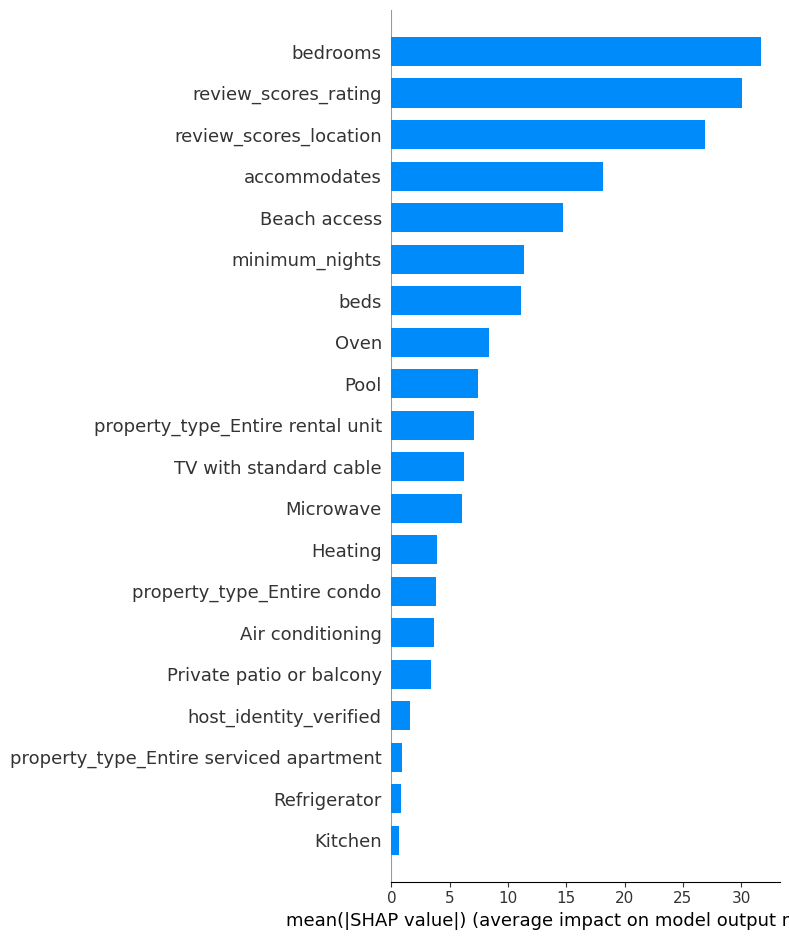

In [239]:
#SHAP
import shap

shap.initjs()

explainer = shap.TreeExplainer(rf_cv.best_estimator_)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type="bar")


Model 3: Boosting

In [23]:
#Boosting model
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=1000, max_depth=10, random_state=20001104)
gb.fit(X, y)
y_pred3 = gb.predict(X)
print("MSE:", mean_squared_error(y, y_pred3))


MSE: 149595.37644204794


## Task 2

Test on other data

In [24]:
df2 = pd.read_csv('data\listings_detailed_dec2022.csv')
df2.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3002,https://www.airbnb.com/rooms/3002,20221215043812,2022-12-16,city scrape,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...",Only renting while I'm gone on vacation or sta...,Waikiki has nice weather 90% percent if the ye...,https://a0.muscache.com/pictures/adf53d15-ab4b...,3364,...,4.87,4.97,4.74,92- 0251181,f,1,0,1,0,1.59
1,5269,https://www.airbnb.com/rooms/5269,20221215043812,2022-12-15,city scrape,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,...,4.87,5.00,4.83,119-269-5808-01R,f,4,4,0,0,0.17
2,5387,https://www.airbnb.com/rooms/5387,20221215043812,2022-12-15,city scrape,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,...,4.87,4.73,4.76,NaN,t,3,3,0,0,1.31
3,5389,https://www.airbnb.com/rooms/5389,20221215043812,2022-12-15,city scrape,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,https://a0.muscache.com/pictures/15520396/3b89...,7878,...,4.85,4.98,4.74,NaN,f,3,3,0,0,0.42
4,5390,https://www.airbnb.com/rooms/5390,20221215043812,2022-12-16,city scrape,STAY AT PRINCE KUHIO!,"<b>The space</b><br />Prince Kuhio, Studio Uni...",NaN,https://a0.muscache.com/pictures/12955/af97ac5...,7887,...,4.78,4.89,4.64,"260050220000, TA-008-490-3424-01",f,1,1,0,0,1.03


Preprocessing

In [25]:
df2 = df2[["price", "beds", "bedrooms",'amenities', "property_type", "room_type", "host_identity_verified","host_has_profile_pic", "accommodates", "minimum_nights", "review_scores_rating", "review_scores_location"]]

df2 = df2[df2['property_type'].isin(['Apartment', 'Entire condo', 'Entire rental unit', 'Entire serviced apartment', "Private room in rental unit","Private room in condo" ])]

df2 = df2[(df2["accommodates"]>1)&(df2["accommodates"]<7)]
df2["price"] = df2["price"].str.replace("$", "").str.replace(",", "")
df2["price"] = df2["price"].astype(float)
df2["host_identity_verified"] = [1 if x == "t" else 0 for x in df2["host_identity_verified"]]
df2["host_has_profile_pic"] = [1 if x == "t" else 0 for x in df2["host_has_profile_pic"]]

df2["Kitchen"] = df2["amenities"].apply(lambda x: 1 if "Kitchen" in x else 0)
df2["Heating"] = df2["amenities"].apply(lambda x: 1 if "Heating" in x else 0)
df2["Microwave"] = df2["amenities"].apply(lambda x: 1 if "Microwave" in x else 0)
df2["Air conditioning"] = df2["amenities"].apply(lambda x: 1 if "Air conditioning" in x else 0)
df2["Refrigerator"] = df2["amenities"].apply(lambda x: 1 if "Refrigerator" in x else 0)
df2["TV with standard cable"]=df2["amenities"].apply(lambda x: 1 if "TV with standard cable" in x else 0)
df2["Pool"]=df2["amenities"].apply(lambda x: 1 if "Pool" in x else 0)
df2["Beach access"]=df2["amenities"].apply(lambda x: 1 if "Beach access" in x else 0)
df2["Private patio or balcony"] = df2["amenities"].apply(lambda x: 1 if "Private patio or balcony" in x else 0)
df2["Oven"]=df2["amenities"].apply(lambda x: 1 if "Oven" in x else 0)
df2.drop(columns=["amenities"], inplace=True)
df2

,price,beds,bedrooms,property_type,room_type,host_identity_verified,host_has_profile_pic,accommodates,minimum_nights,review_scores_rating,...,Kitchen,Heating,Microwave,Air conditioning,Refrigerator,TV with standard cable,Pool,Beach access,Private patio or balcony,Oven
0,106.0,1.0,1.0,Private room in condo,Private room,1,1,2,4,4.72,...,1,0,1,1,1,1,1,0,1,0
1,149.0,1.0,1.0,Entire rental unit,Entire home/apt,1,1,2,5,4.65,...,1,0,0,0,1,1,0,0,0,1
2,105.0,2.0,NaN,Entire rental unit,Entire home/apt,1,1,2,5,4.65,...,1,0,1,0,1,0,0,0,1,1
4,130.0,1.0,NaN,Entire condo,Entire home/apt,1,1,4,3,4.37,...,1,0,1,1,1,1,1,0,0,1
6,150.0,1.0,1.0,Private room in rental unit,Private room,1,1,2,3,4.72,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30056,72.0,3.0,2.0,Entire rental unit,Entire home/apt,1,1,6,1,NaN,...,1,0,1,0,1,0,0,0,0,1
30057,162.0,2.0,1.0,Entire rental unit,Entire home/apt,1,1,4,1,NaN,...,1,0,1,0,1,1,0,0,1,0
30059,198.0,2.0,1.0,Entire rental unit,Entire home/apt,1,1,4,2,NaN,...,1,1,0,0,0,0,1,0,0,0
30060,164.0,1.0,NaN,Entire rental unit,Entire home/apt,1,1,2,2,NaN,...,0,1,0,0,0,0,1,0,0,0


In [26]:
#One hot encoding
df2 = pd.get_dummies(df2, columns=["property_type", "room_type"])
df2.replace(True, 1, inplace=True)
df2.replace(False, 0, inplace=True)
df2 = df2.dropna().reset_index(drop=True)
df2

,price,beds,bedrooms,host_identity_verified,host_has_profile_pic,accommodates,minimum_nights,review_scores_rating,review_scores_location,Kitchen,...,Beach access,Private patio or balcony,Oven,property_type_Entire condo,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Private room in condo,property_type_Private room in rental unit,room_type_Entire home/apt,room_type_Private room
0,106.0,1.0,1.0,1,1,2,4,4.72,4.97,1,...,0,1,0,0,0,0,1,0,0,1
1,149.0,1.0,1.0,1,1,2,5,4.65,5.00,1,...,0,0,1,0,1,0,0,0,1,0
2,150.0,1.0,1.0,1,1,2,3,4.72,4.93,0,...,0,1,0,0,0,0,0,1,0,1
3,219.0,2.0,1.0,1,1,4,4,4.62,4.83,1,...,1,1,1,1,0,0,0,0,1,0
4,464.0,3.0,2.0,1,1,6,1,4.66,4.85,1,...,1,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12142,179.0,3.0,2.0,1,1,5,2,5.00,5.00,1,...,0,0,1,0,1,0,0,0,1,0
12143,185.0,2.0,1.0,1,1,4,1,5.00,5.00,1,...,0,0,1,0,1,0,0,0,1,0
12144,228.0,1.0,1.0,1,1,2,1,5.00,5.00,1,...,1,0,0,1,0,0,0,0,1,0
12145,135.0,2.0,1.0,1,1,4,1,5.00,5.00,1,...,0,0,1,0,1,0,0,0,1,0


In [27]:
#Take log of price
df2 = df2[(df2["price"] < 30000)&(df2["price"]>0)].reset_index(drop=True)
df2["log_price"] = np.log(df2["price"])

#Normalizing
for col in df.columns[1:]:
    df[col] = (df[col] - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))
df

,price,beds,bedrooms,host_identity_verified,host_has_profile_pic,accommodates,minimum_nights,review_scores_rating,review_scores_location,Kitchen,...,Beach access,Private patio or balcony,Oven,property_type_Entire condo,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Private room in condo,property_type_Private room in rental unit,room_type_Entire home/apt,room_type_Private room
0,90.0,0.000000,0.000000,1.0,1.0,0.00,0.016304,0.9300,0.9900,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,140.0,0.000000,0.000000,1.0,1.0,0.00,0.021739,0.9175,1.0000,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,110.0,0.000000,0.000000,0.0,1.0,0.00,0.010870,0.8850,0.9325,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,195.0,0.142857,0.142857,0.0,1.0,1.00,0.010870,0.9100,0.9425,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,200.0,0.142857,0.000000,1.0,1.0,0.50,0.016304,0.9175,0.9575,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184,193.0,0.142857,0.000000,1.0,0.0,0.50,0.000000,1.0000,1.0000,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13185,88.0,0.000000,0.000000,1.0,1.0,0.00,0.000000,1.0000,1.0000,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13186,159.0,0.285714,0.000000,1.0,1.0,0.50,0.010870,1.0000,1.0000,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13187,75.0,0.000000,0.000000,1.0,1.0,0.25,0.010870,1.0000,1.0000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
#Model 1:

X = df2.drop(columns=["log_price","price"])
y = df2["log_price"]

y_pred = model1.predict(X)
y_pred_transformed = np.exp(y_pred)*np.exp((np.std(y_pred)**2)/2)
y_transformed = np.exp(y)
print("MSE:", mean_squared_error(y_transformed, y_pred_transformed))

#Model 2:
y = df2["price"]
y_pred2 = rf_cv.predict(X)
print("MSE:", mean_squared_error(y, y_pred2))

#Model 3:
y_pred3 = gb.predict(X)
print("MSE:", mean_squared_error(y, y_pred3))


MSE: 9.587811227477095e+20
MSE: 460831.82996425463
MSE: 503674.56028642994
